<a href="https://colab.research.google.com/github/PreciousGemstone/CSSI-97-Project-insert_team_name-/blob/main/Project_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

In [ ]:
def three_metrics(y_test, y_pred):

  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)


  print("Mean Squared Error: " + str(mse))
  print("Mean Absolute Error: " + str(mae))
  print("r2 score: " + str(r2))

In [ ]:
data = 'https://raw.githubusercontent.com/PreciousGemstone/CSSI-97-Project-insert_team_name-/refs/heads/main/laptop_prices.csv'
laptop = pd.read_csv(data)

X_train_data = 'https://raw.githubusercontent.com/PreciousGemstone/CSSI-97-Project-insert_team_name-/refs/heads/main/X_train.csv'
X_train = pd.read_csv(X_train_data)

X_test_data = 'https://raw.githubusercontent.com/PreciousGemstone/CSSI-97-Project-insert_team_name-/refs/heads/main/X_test.csv'
X_test = pd.read_csv(X_test_data)

y_train_data = 'https://raw.githubusercontent.com/PreciousGemstone/CSSI-97-Project-insert_team_name-/refs/heads/main/y_train.csv'
y_train = pd.read_csv(y_train_data)

y_test_data = 'https://raw.githubusercontent.com/PreciousGemstone/CSSI-97-Project-insert_team_name-/refs/heads/main/y_test.csv'
y_test = pd.read_csv(y_test_data)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(pca.explained_variance_ratio_)

[0.14340708 0.09546606]


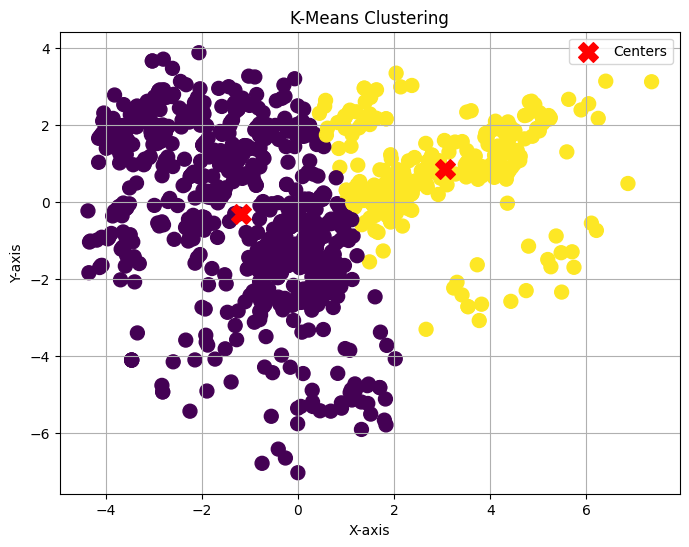

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_pca)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=100)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centers')
plt.title("K-Means Clustering")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)
plt.show()